## Import zone

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Input File

In [ ]:
df = pd.read_csv('../data/01_raw/df_challenge_meli.csv', encoding='latin-1')

## Analisis exploratorio

In [30]:
df.head(3)

,tim_day,seller_nickname,titulo,seller_reputation,stock,logistic_type,condition,is_refurbished,price,regular_price,categoria,url,category_id,category_name
0,2024-08-01,5a39342818,Gel Cerave Limpiador Espumoso Piel Normal A Gr...,green_platinum,16155,FBM,new,False,260.93,355.0,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-17883...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
1,2024-08-01,5a39342818,Kit Garnier Express Aclara Serum +crema +gel C...,green_platinum,6253,FBM,new,False,344.26,NaN,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-31259...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
2,2024-08-01,66d9659692,3 Piezas De Minoxidil 5% Anacastel,green_platinum,10066,FBM,new,False,363.00,660.0,HAIR,https://articulo.mercadolibre.com.mx/MLM-19360...,HAIR,CUIDADO DEL CABELLO


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185250 entries, 0 to 185249
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tim_day            185250 non-null  object 
 1   seller_nickname    185250 non-null  object 
 2   titulo             185250 non-null  object 
 3   seller_reputation  182878 non-null  object 
 4   stock              185250 non-null  int64  
 5   logistic_type      185250 non-null  object 
 6   condition          185250 non-null  object 
 7   is_refurbished     185250 non-null  bool   
 8   price              183734 non-null  float64
 9   regular_price      49956 non-null   float64
 10  categoria          185250 non-null  object 
 11  url                185250 non-null  object 
 12  category_id        185250 non-null  object 
 13  category_name      185250 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 18.6+ MB


regular_price tiene un porcentaje alto de valores nulos, por lo que no se tomará en cuenta en el análisis

In [32]:
df.describe()

,stock,price,regular_price
count,185250.000000,1.837340e+05,49956.000000
mean,307.017090,3.701531e+04,1614.429170
std,3367.216679,1.124158e+07,8408.645951
min,0.000000,0.000000e+00,6.100000
25%,2.000000,2.700000e+02,278.672500
50%,8.000000,5.681000e+02,499.000000
75%,42.000000,1.387000e+03,1099.990000
max,99999.000000,4.772354e+09,999999.000000


Hay una gran variación en los precios y stock, con una media que puede estar sesgada por productos de muy alto valor. La mayoría de los productos se concentran en un rango de precios más bajo.

**price** y **stock** tienen outliers extremos (se deben tratar antes de hacer la clusterización)

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185250 entries, 0 to 185249
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tim_day            185250 non-null  object 
 1   seller_nickname    185250 non-null  object 
 2   titulo             185250 non-null  object 
 3   seller_reputation  182878 non-null  object 
 4   stock              185250 non-null  int64  
 5   logistic_type      185250 non-null  object 
 6   condition          185250 non-null  object 
 7   is_refurbished     185250 non-null  bool   
 8   price              183734 non-null  float64
 9   regular_price      49956 non-null   float64
 10  categoria          185250 non-null  object 
 11  url                185250 non-null  object 
 12  category_id        185250 non-null  object 
 13  category_name      185250 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 18.6+ MB


In [35]:
df['tim_day'].unique()

array(['2024-08-01'], dtype=object)

In [36]:
df['seller_nickname'].unique()

array(['5a39342818', '66d9659692', '3059e1c98b', ..., '51110d0ad0',
       'e18938e938', 'af958de9cc'], shape=(46586,), dtype=object)

In [37]:
df['titulo'].unique()

array(['Gel Cerave Limpiador Espumoso Piel Normal A Grasa Sin Perfume De 473 Ml',
       'Kit Garnier Express Aclara Serum +crema +gel Con Vitamina C Tipo De Piel Normal',
       '3 Piezas De Minoxidil 5% Anacastel', ...,
       'Rock Series Bocina Tipo Subwoofer Rks-1204os Para Auto/camioneta Color Negro De 4 X 1 Unidad ',
       'Alarma Scorpion De Venom',
       "Mikel's Cu-pd Cubrevolante Deportivo Universal De Piel Color"],
      shape=(174746,), dtype=object)

In [38]:
df['condition'].value_counts()

condition
new              169616
used              15551
not_specified        83
Name: count, dtype: int64

In [49]:
df['seller_reputation'].value_counts()

seller_reputation
green_platinum    69625
green             33838
green_gold        28332
green_silver      24731
newbie             9221
yellow             7245
red                4219
light_green        3101
orange             2566
Name: count, dtype: int64

La mayoría de los vendedores tienen una reputación green_platinum, el nivel más alto, lo que sugiere una alta calidad de servicio en general.

In [ ]:
df['seller_reputation'].value_counts()

In [40]:
df['logistic_type'].value_counts()

logistic_type
XD      116763
FBM      31483
DS       24645
Otro     10541
FLEX      1818
Name: count, dtype: int64

185.250 registros en 14 columnas

46.586 vendedores únicos

174.746 productos

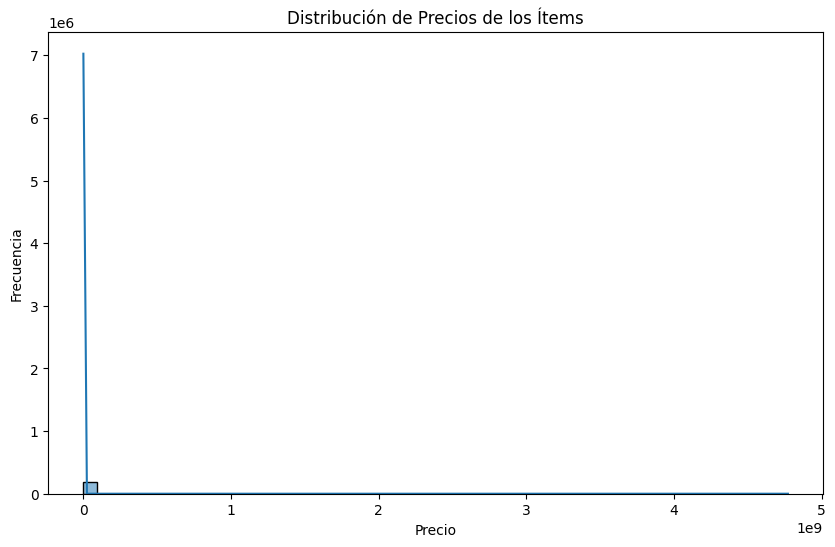

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de Precios de los Ítems')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
# Podrías necesitar limitar el eje x si hay outliers extremos
# plt.xlim(0, df['price'].quantile(0.95))
plt.show()

Los outliers distorcionan el histograma

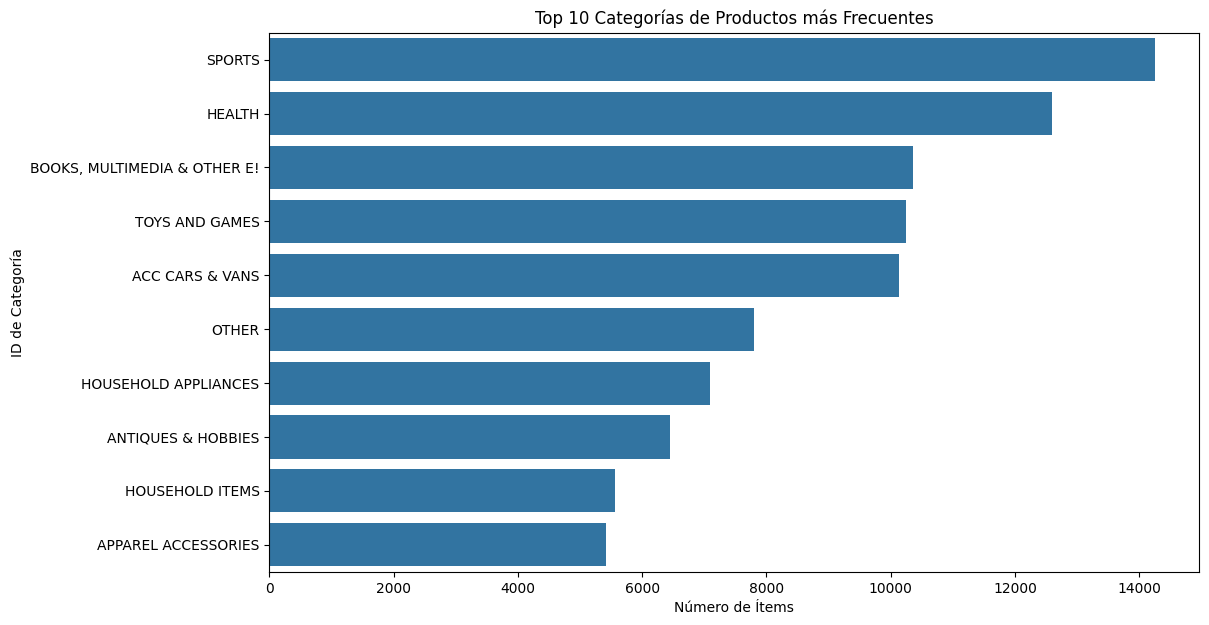

In [41]:
plt.figure(figsize=(12, 7))
top_categories = df['category_id'].value_counts().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, orient='h')
plt.title('Top 10 Categorías de Productos más Frecuentes')
plt.xlabel('Número de Ítems')
plt.ylabel('ID de Categoría')
plt.show()

Las categorías más frecuentes en el conjunto de datos, lo que indica que los productos de estas áreas son los más numerosos.

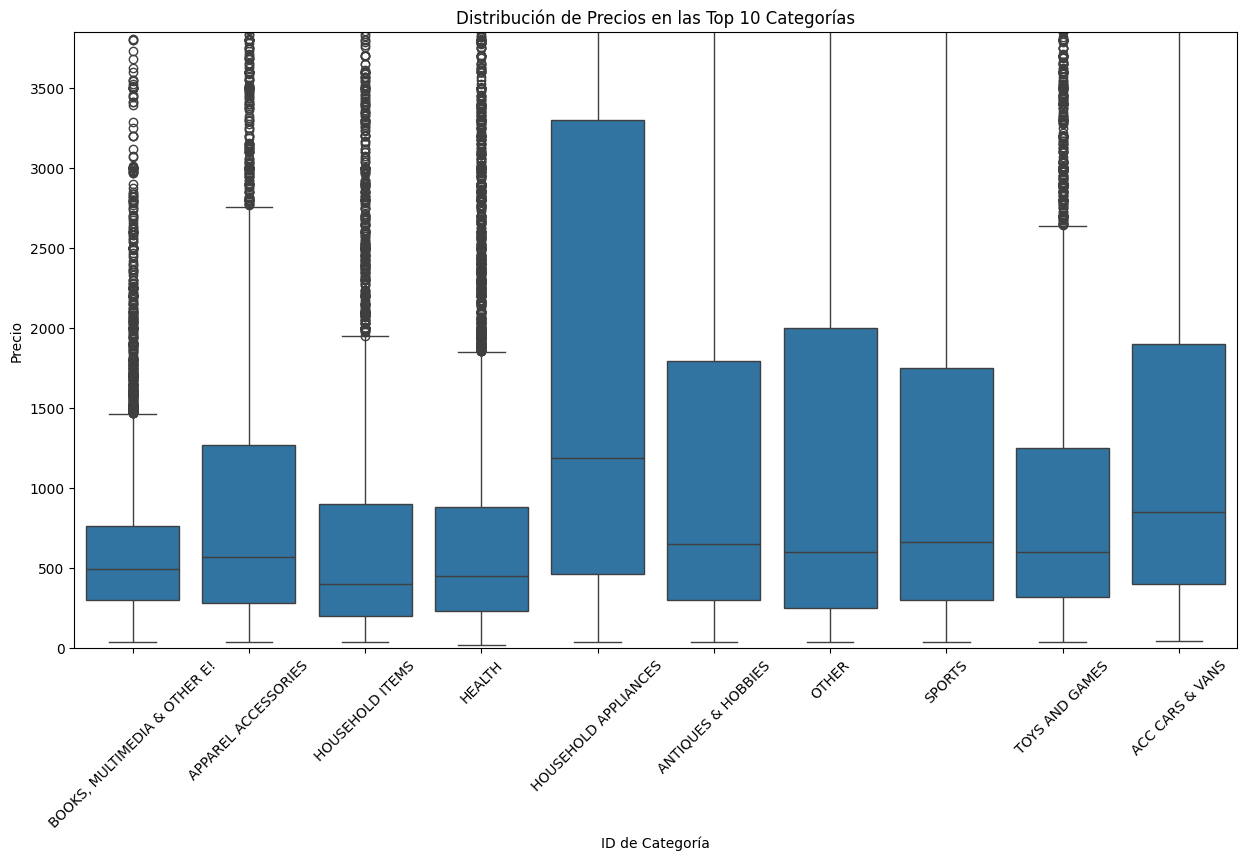

In [21]:
plt.figure(figsize=(15, 8))
# Usemos solo las top 10 categorías para que el gráfico sea legible
top_10_categories = df['category_id'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['category_id'].isin(top_10_categories)], x='category_id', y='price')
plt.title('Distribución de Precios en las Top 10 Categorías')
plt.xlabel('ID de Categoría')
plt.ylabel('Precio')
plt.xticks(rotation=45)
# Es muy probable que necesites limitar el eje Y para evitar que los outliers aplasten el gráfico
plt.ylim(0, df['price'].quantile(0.90)) # Mostramos hasta el percentil 90
plt.show()

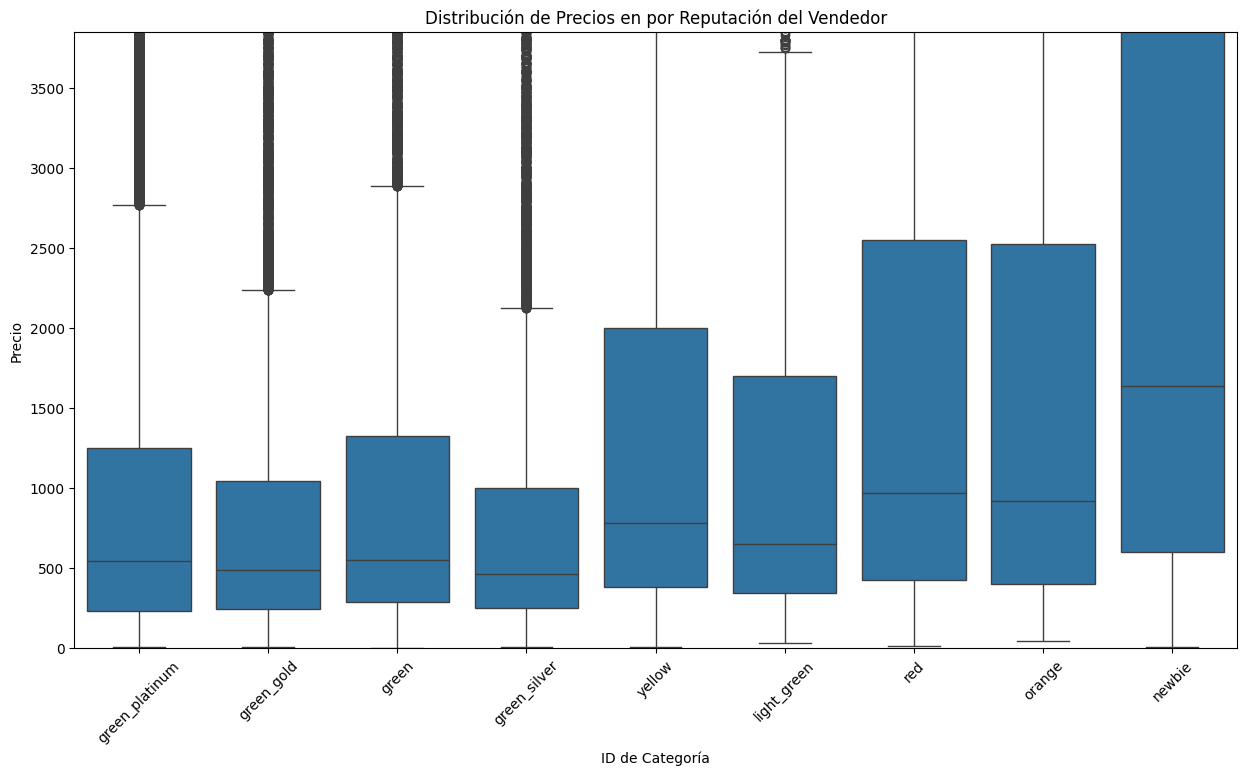

In [44]:
plt.figure(figsize=(15, 8))

seller_reputation = df['seller_reputation'].value_counts().index
sns.boxplot(data=df[df['seller_reputation'].isin(seller_reputation)], x='seller_reputation', y='price')
plt.title('Distribución de Precios en por Reputación del Vendedor')
plt.xlabel('ID de Categoría')
plt.ylabel('Precio')
plt.xticks(rotation=45)
# Es muy probable que necesites limitar el eje Y para evitar que los outliers aplasten el gráfico
plt.ylim(0, df['price'].quantile(0.90)) # Mostramos hasta el percentil 90
plt.show()

Los vendedores con mejor reputación tienden a vender productos más caros.

Gráfico 'matriz_correlacion.png' generado.


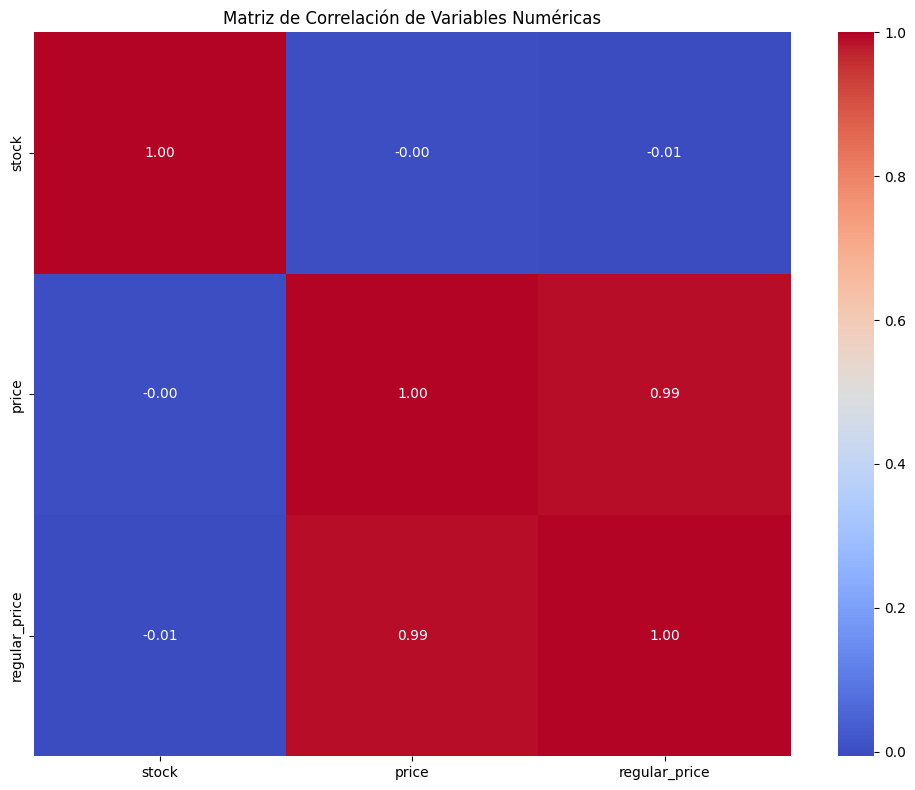

In [45]:
df_numeric = df.select_dtypes(include=np.number)
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
print("Gráfico 'matriz_correlacion.png' generado.")

Una relación fuerte entre price y regular_price es esperada. La correlación entre stock y price es muy débil, lo que sugiere que el precio de un artículo no está directamente relacionado con la cantidad disponible.